# Cyber Bulling Detection using NLP & Machine Learning

### 1. Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

### 2. Import Dataset

In [50]:
imdf_cyber = pd.read_csv("Dataset/cyberbullying_tweets.csv")

### 3.  Check first 10 lines

In [51]:
imdf_cyber.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


### 4. Check datasets type values and sum

In [52]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

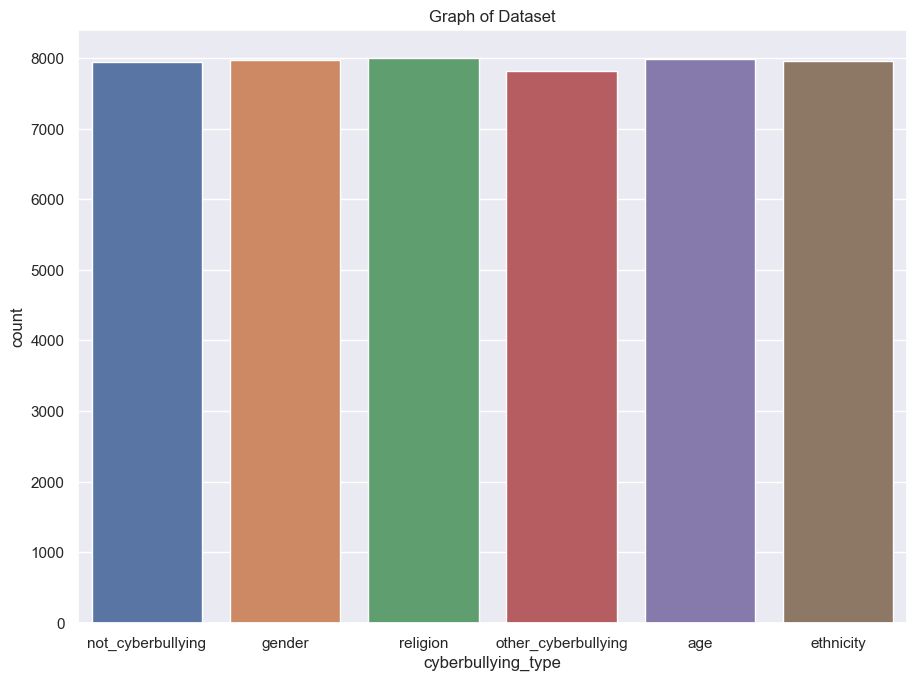

In [53]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=imdf_cyber).set(title="Graph of Dataset")

### 6. Classification for cyberbulling/not cyberbulling to 1/0

In [54]:
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"not_cyberbullying": 0})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"ethnicity": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"age": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"gender": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"religion": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"other_cyberbullying": 1})
imdf_cyber.to_csv('Dataset/cyberbullying_tweets_class.csv', index=False)

In [55]:
imdf_cyber.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


In [56]:
imdf_cyber.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,1


### 7. Cleaning the tweet text

In [57]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

In [58]:
imdf_cyber["tweet_text"] = imdf_cyber["tweet_text"].apply(clean_tweets)

In [59]:
imdf_cyber.dropna(inplace = True)
imdf_cyber.to_csv('Dataset/cyberbullying_tweets_remove.csv', index=False)

In [60]:
imdf_cyber.head(30)

,tweet_text,cyberbullying_type
0,In other words katandandre your food was crapi...,0
1,Why is aussietv so white MKR theblock ImACeleb...,0
2,a classy whore Or more red velvet cupcakes,0
3,meh P thanks for the heads up but not too con...,0
4,This is an ISIS account pretending to be a Kur...,0
5,Yes the test of god is that good or bad or ind...,0
6,Itu sekolah ya bukan tempat bully Ga jauh kaya...,0
7,Karma I hope it bites Kat on the butt She is j...,0
8,everything but mostly my priest,0
9,Rebecca Black Drops Out of School Due to Bullying,0


### 8. Drop empty tweets

In [62]:
imdf_cyber= imdf_cyber[imdf_cyber['tweet_text'] != ""]

In [63]:
imdf_cyber.to_csv('Dataset/cyberbullying_tweets_remove_empty.csv', index=False)

In [64]:
imdf_cyber.head(30)

,tweet_text,cyberbullying_type
0,In other words katandandre your food was crapi...,0
1,Why is aussietv so white MKR theblock ImACeleb...,0
2,a classy whore Or more red velvet cupcakes,0
3,meh P thanks for the heads up but not too con...,0
4,This is an ISIS account pretending to be a Kur...,0
5,Yes the test of god is that good or bad or ind...,0
6,Itu sekolah ya bukan tempat bully Ga jauh kaya...,0
7,Karma I hope it bites Kat on the butt She is j...,0
8,everything but mostly my priest,0
9,Rebecca Black Drops Out of School Due to Bullying,0


### 9. Graph for clean Dataset

[Text(0.5, 1.0, 'Graph of clean Dataset')]

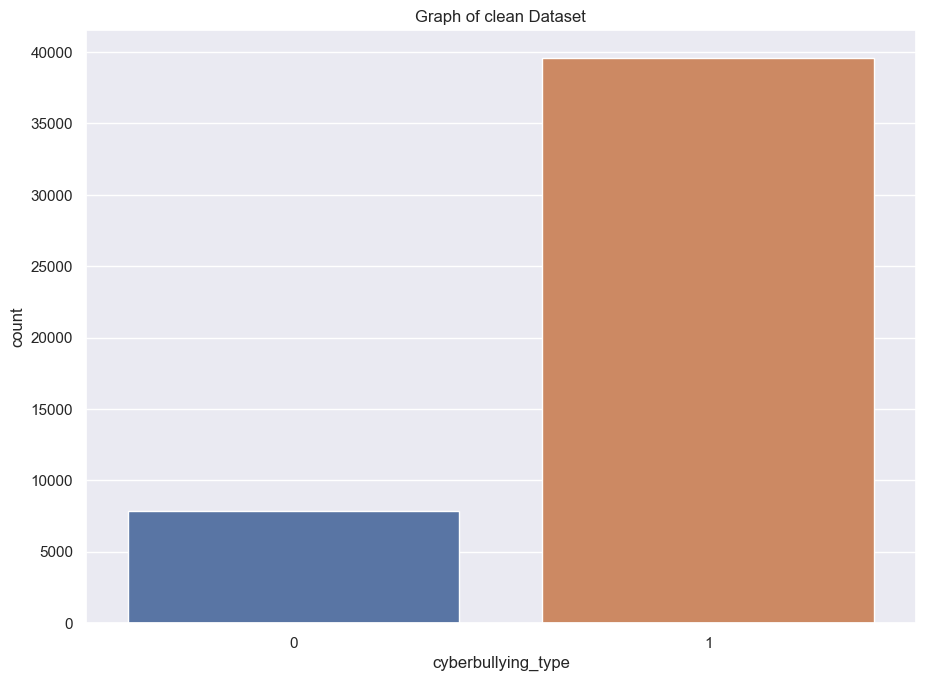

In [66]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=imdf_cyber).set(title="Graph of clean Dataset")